In [7]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced data visualization
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree Classifier and visualization
from sklearn.model_selection import train_test_split, GridSearchCV  # Dataset splitting and hyperparameter tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics


Explanation:

Imports various libraries for data handling, machine learning, visualization, and evaluation.

In [8]:
# Load the breast cancer dataset
cancer = pd.read_csv("breast-cancer.csv")  # Reading the CSV file containing the dataset


Explanation:

Loads the breast cancer dataset from a CSV file into a Pandas DataFrame named cancer.


In [9]:
# Display the first 3 rows of the dataset for an overview
print("First 3 rows of the dataset:\n", cancer.head(3))  # Printing the first three rows of the dataset


First 3 rows of the dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   
2  ...         23.57          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points

Explanation:

Displays the first three rows of the dataset to get an overview of its structure and values.

In [10]:
# Display information about the dataset, including data types and missing values
print("\nDataset Info:\n")
cancer.info()  # Providing details about the dataset structure



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_

Explanation:

Prints the information about the dataset, such as data types and the presence of any missing values.

In [11]:
# Preparing the data
# Map target variable to binary encoding (Malignant: 1, Benign: 0)
y = cancer["diagnosis"].map({'M': 1, 'B': 0})  # Encoding 'M' as 1 and 'B' as 0 for the target variable
# Drop the 'diagnosis' and 'id' columns to keep only features
x = cancer.drop(columns=["diagnosis", "id"], axis=1)  # Dropping non-feature columns for model training


Explanation:

Maps the target variable (diagnosis) to binary values (Malignant: 1, Benign: 0).

Drops non-feature columns (diagnosis and id) to retain only the features needed for model training.

In [12]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)  
# Dividing data into training and testing subsets


Explanation:

Splits the dataset into training (80%) and testing (20%) subsets for model training and evaluation.

In [13]:
# Creating and training the Decision Tree Classifier with hyperparameter tuning
tree = DecisionTreeClassifier(random_state=42)  # Initializing the Decision Tree Classifier with a fixed random state


Explanation:
Initializes the Decision Tree Classifier, ensuring reproducibility by setting a random state.

In [15]:
# Define parameter grid for GridSearchCV for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Different values for maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}


Explanation:

Defines a parameter grid for hyperparameter tuning using GridSearchCV, allowing exploration of different values for tree depth and splitting criteria.

In [16]:
# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  
# Setting up grid search for cross-validation to find the best hyperparameters
grid_search.fit(x_train, y_train)  # Fit grid search to the training data


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

Explanation:

Uses GridSearchCV to find the best hyperparameters through cross-validation (5-fold) based on accuracy.


In [17]:
# Best estimator from grid search
best_tree = grid_search.best_estimator_  # Getting the best model after tuning


Explanation:

Retrieves the best-performing Decision Tree model from the grid search.


In [18]:
# Evaluating the model
y_pred = best_tree.predict(x_test)  # Making predictions on the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculating the accuracy of the model
print(f"\nModel Accuracy: {accuracy:.2f}")  # Displaying the accuracy of the model



Model Accuracy: 0.95


Explanation:

Makes predictions on the test set and calculates the model's accuracy, displaying it in a formatted message.


In [19]:
# Displaying the classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))  
# Showing precision, recall, and F1-score for each class



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Explanation:

Displays a detailed classification report including precision, recall, and F1-score for each class.


In [20]:
# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Creating confusion matrix to evaluate model performance


Explanation:

Generates a confusion matrix to assess the performance of the model.


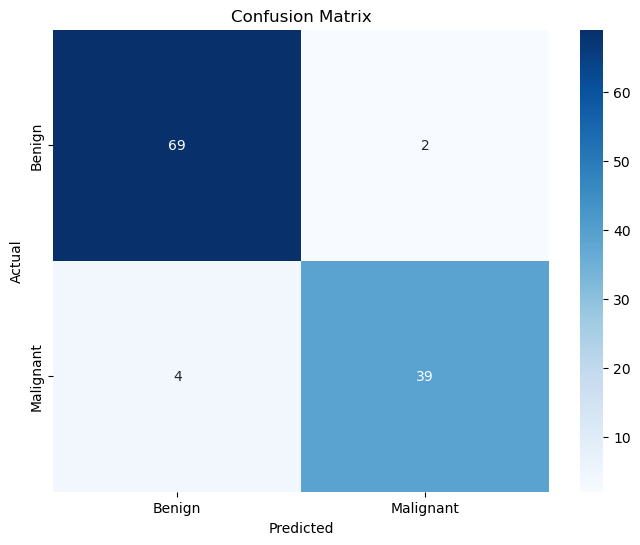

In [21]:
# Visualizing the confusion matrix with a heatmap for better interpretation
plt.figure(figsize=(8, 6))  # Setting figure size for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])  
# Plotting confusion matrix using a heatmap
plt.title('Confusion Matrix')  # Title for the plot
plt.ylabel('Actual')  # Y-axis label
plt.xlabel('Predicted')  # X-axis label
plt.show()  # Display the plot


Explanation:

Visualizes the confusion matrix using a heatmap for intuitive understanding of model performance.


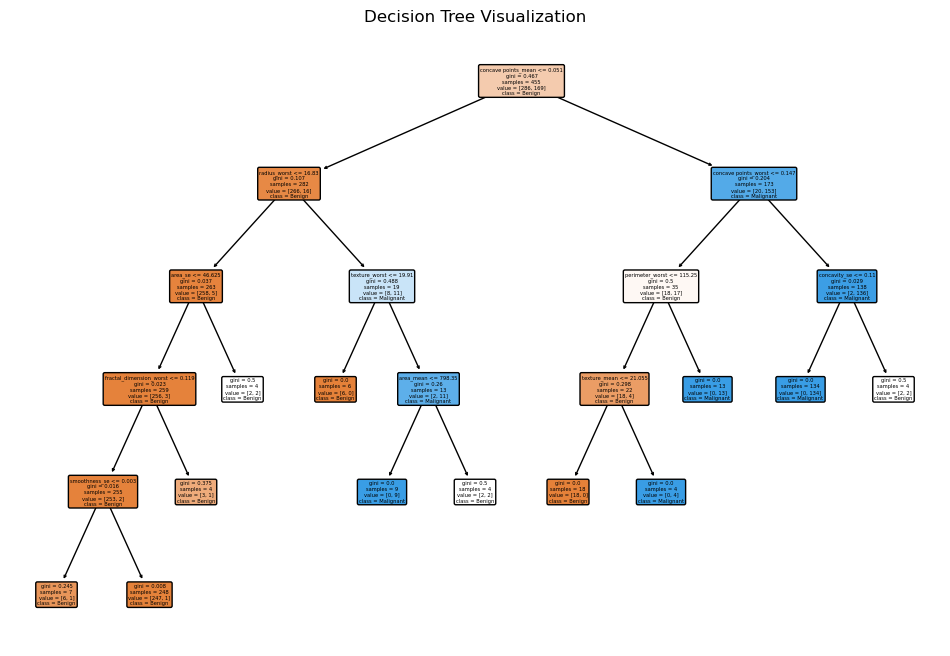

In [22]:
# Visualizing the Decision Tree for better understanding of decision-making
plt.figure(figsize=(12, 8))  # Setting the figure size for the tree plot
plot_tree(best_tree, feature_names=x.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True)  
# Plotting the decision tree with filled colors for classes
plt.title('Decision Tree Visualization')  # Title for the plot
plt.show()  # Display the tree plot


Explanation:

Visualizes the structure of the decision tree to illustrate how decisions are made based on the features.

In [23]:
# Analyzing feature importance to identify high-risk characteristics
feature_importance = best_tree.feature_importances_  # Getting feature importance scores from the decision tree
features = x.columns  # Getting feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})  # Creating a DataFrame for visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sorting by importance scores


Explanation:

Extracts feature importance scores from the decision tree, creating a DataFrame to visualize which features are most influential in making predictions.

In [24]:
# Displaying feature importance
print("\nFeature Importance:\n", importance_df)  # Printing the feature importance DataFrame



Feature Importance:
                     Feature  Importance
7       concave points_mean    0.729920
27     concave points_worst    0.069306
20             radius_worst    0.055211
22          perimeter_worst    0.054361
1              texture_mean    0.032524
21            texture_worst    0.029210
16             concavity_se    0.009650
13                  area_se    0.009339
3                 area_mean    0.006880
29  fractal_dimension_worst    0.002295
14            smoothness_se    0.001304
23               area_worst    0.000000
18              symmetry_se    0.000000
24         smoothness_worst    0.000000
25        compactness_worst    0.000000
26          concavity_worst    0.000000
28           symmetry_worst    0.000000
19     fractal_dimension_se    0.000000
0               radius_mean    0.000000
17        concave points_se    0.000000
12             perimeter_se    0.000000
11               texture_se    0.000000
10                radius_se    0.000000
9    fractal_dimen

Explanation:

Prints the feature importance DataFrame to show which features are most significant in the classification process.

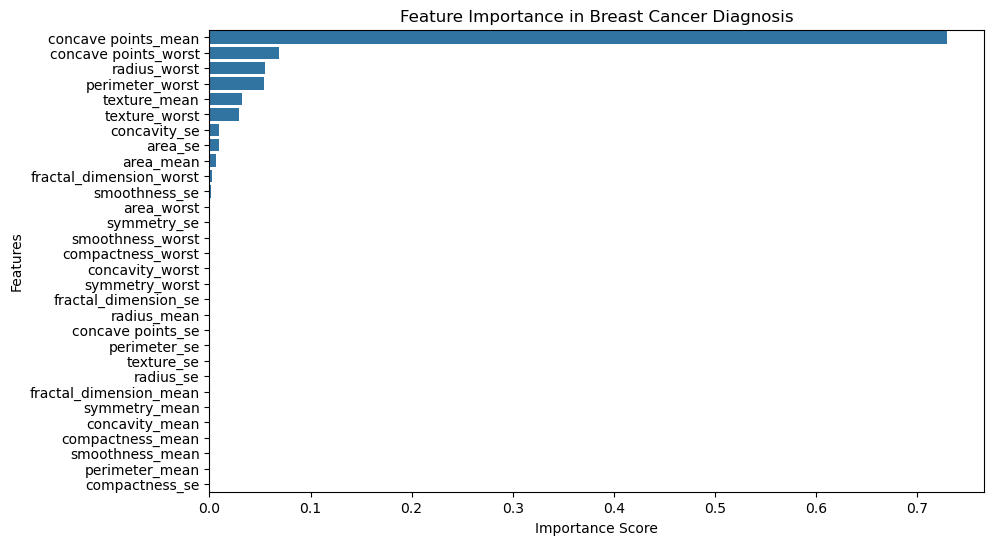

In [25]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))  # Setting figure size for feature importance plot
sns.barplot(x='Importance', y='Feature', data=importance_df)  # Creating a bar plot for feature importance
plt.title('Feature Importance in Breast Cancer Diagnosis')  # Title for the plot
plt.xlabel('Importance Score')  # X-axis label
plt.ylabel('Features')  # Y-axis label
plt.show()  # Display the plot


Explanation:

Visualizes the importance of each feature using a bar plot, making it easy to compare their significance.

In [26]:
# Function to make predictions for new data
def make_prediction(input_data):
    """
    Makes a prediction based on input features.
    
    Args:
    input_data (dict): A dictionary containing feature values.

    Returns:
    int: Predicted class (1 for Malignant, 0 for Benign).
    """
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data], columns=x.columns)  # Creating a DataFrame with the same columns as x
    prediction = best_tree.predict(input_df)  # Making a prediction based on the input DataFrame
    return prediction[0]  # Returning the prediction (Malignant: 1, Benign: 0)


Explanation:

Defines a function make_prediction that takes input feature values and returns a prediction (Malignant or Benign) based on the trained model.

In [27]:
# Example usage of the prediction function
# Replace the values below with the actual feature values for prediction
new_data = {
    "feature1": 10,  # Replace with actual feature name and value
    "feature2": 20,  # Replace with actual feature name and value
    # Add all necessary features
}
result = make_prediction(new_data)  # Making a prediction for new data
print(f"The prediction for the new input data is: {'Malignant' if result == 1 else 'Benign'}")  # Printing the prediction result


The prediction for the new input data is: Benign


Explanation:

Demonstrates how to use the make_prediction function with example feature values, printing the predicted result.